<a href="https://colab.research.google.com/github/yt405099/W3-pandas-eda/blob/main/WHO_Life_Expectancy_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WHO Life Expectancy EDA

## Objective
Explore global life expectancy data to identify key patterns, regional differences, and temporal trends.

## Dataset
Source: Keggle Life Expectancy(WHO) Dataset

In [1]:
!git clone https://github.com/yt405099/W3-pandas-eda.git

Cloning into 'W3-pandas-eda'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 14 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (14/14), 121.91 KiB | 3.39 MiB/s, done.


In [2]:
!ls

sample_data  W3-pandas-eda


In [3]:
!ls W3-pandas-eda
!ls W3-pandas-eda/data

data  README.md
life_expectancy.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Loading and Initial Inspection

Before any analysis, we first inspect the structure of the dataset to understand its size, data types, and overall completeness.

Specifically, we examin:
- The number of rows and columns
- Data types of each column
- Presence of missing values
- Whether the dataset strcture is suitable for further analysis

In [5]:
df = pd.read_csv("W3-pandas-eda/data/life_expectancy.csv")
df.shape

(2938, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

## Missing Value Analysis

In this section, we examine the presence and extent of missing values
across variables to assess data quality and determine necessary
preprocessing steps.


In [7]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [8]:
(df.isnull().mean() * 100).sort_values(ascending=False)

,0
Population,22.191967
Hepatitis B,18.822328
GDP,15.248468
Total expenditure,7.692308
Alcohol,6.603131
Income composition of resources,5.684139
Schooling,5.547992
thinness 1-19 years,1.157250
thinness 5-9 years,1.157250
BMI,1.157250


In [9]:
df.columns[df.isnull().any()]

Index(['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B',
       ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP',
       'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## Descriptive Statistics

This section summarizes the central tendency and variability of
numerical variables to provide an initial understanding of the data
distribution.


In [10]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [11]:
df.describe(include='object')

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


In [12]:
df.describe().T
#For reading purpose

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


## Distribution of Numerical Variables

In this section, histograms are used to examine the distribution,
skewness, and potential outliers of numerical variables.


In [13]:
numeric_cols = df.select_dtypes(include="number").columns
numeric_cols

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

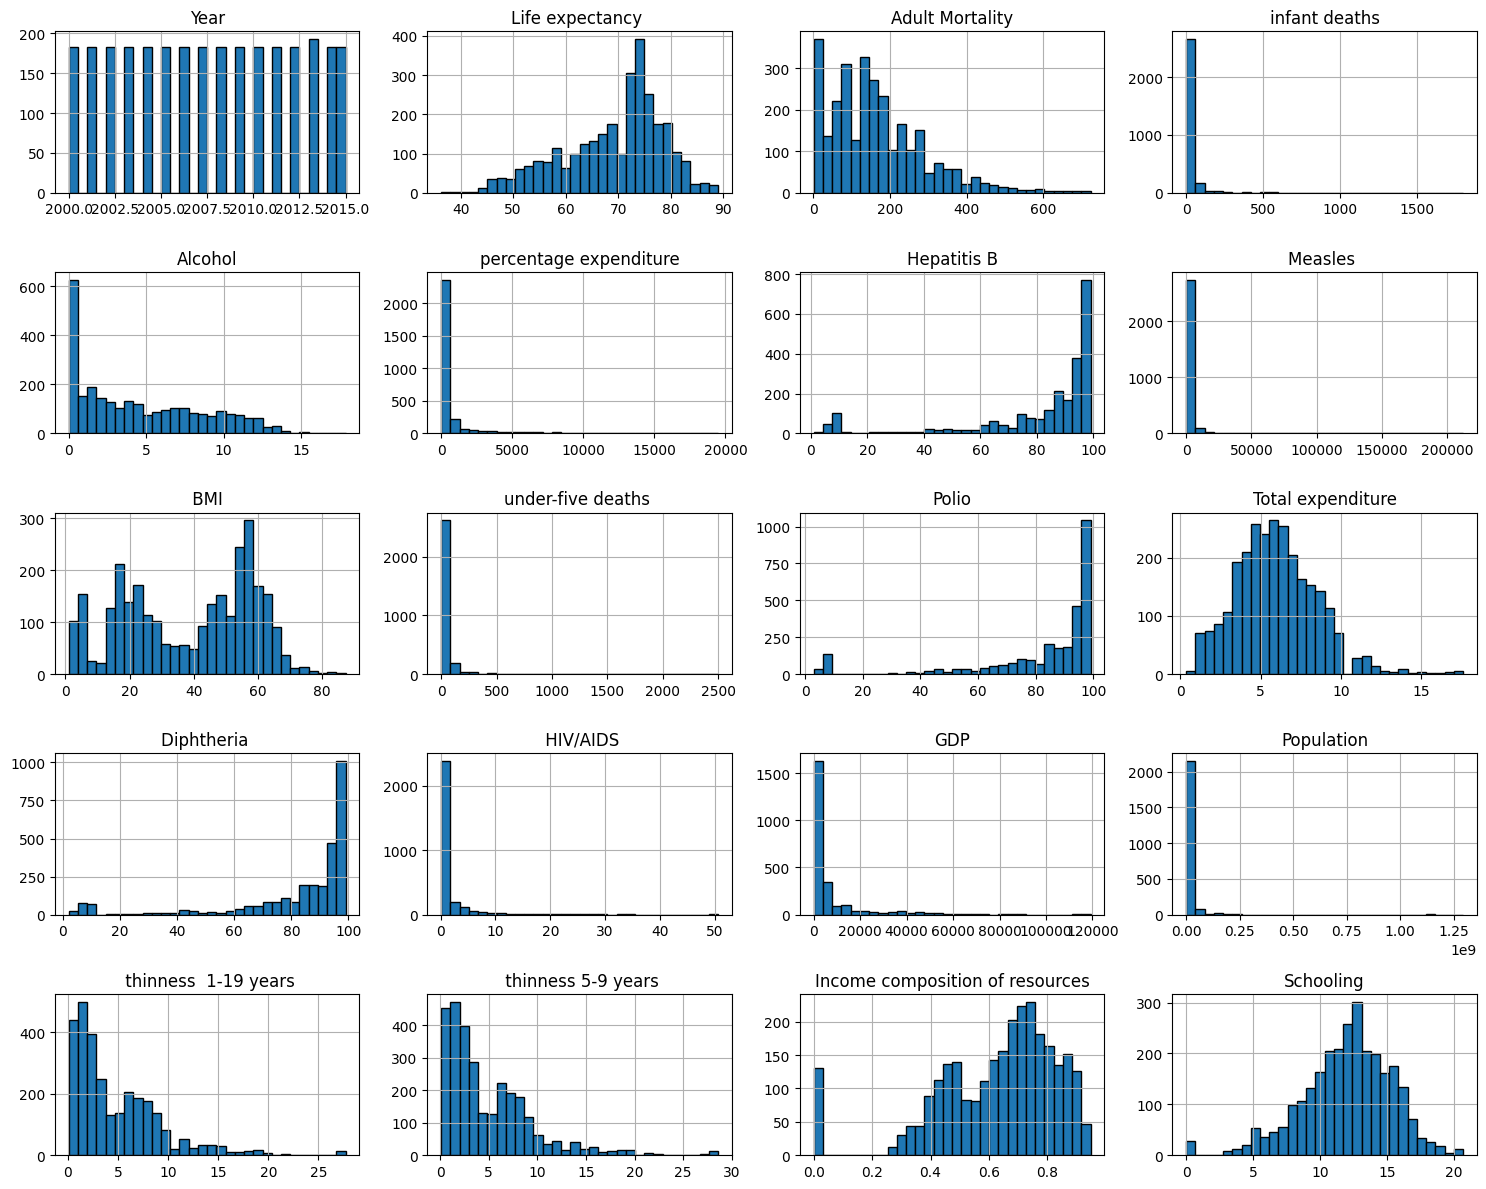

In [14]:
df[numeric_cols].hist(
    figsize=(15,12),
    bins=30,
    edgecolor="black"
    )

plt.tight_layout()
plt.show

### Key Observations from Distributions

Several variables such as GDP, population, and mortality-related indicators
show strong right-skewed distributions, indicating large disparities
across countries. Vaccination coverage variables show ceiling effects near
100%, while life expectancy appears approximately normally distributed with
a left tail driven by lower-income regions.


## Correlation Analysis

This section examines the relationships between numerical variables
to identify strong positive or negative associations relevant to
life expectancy.


In [15]:
corr = df.select_dtypes(include="number").corr()
corr

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


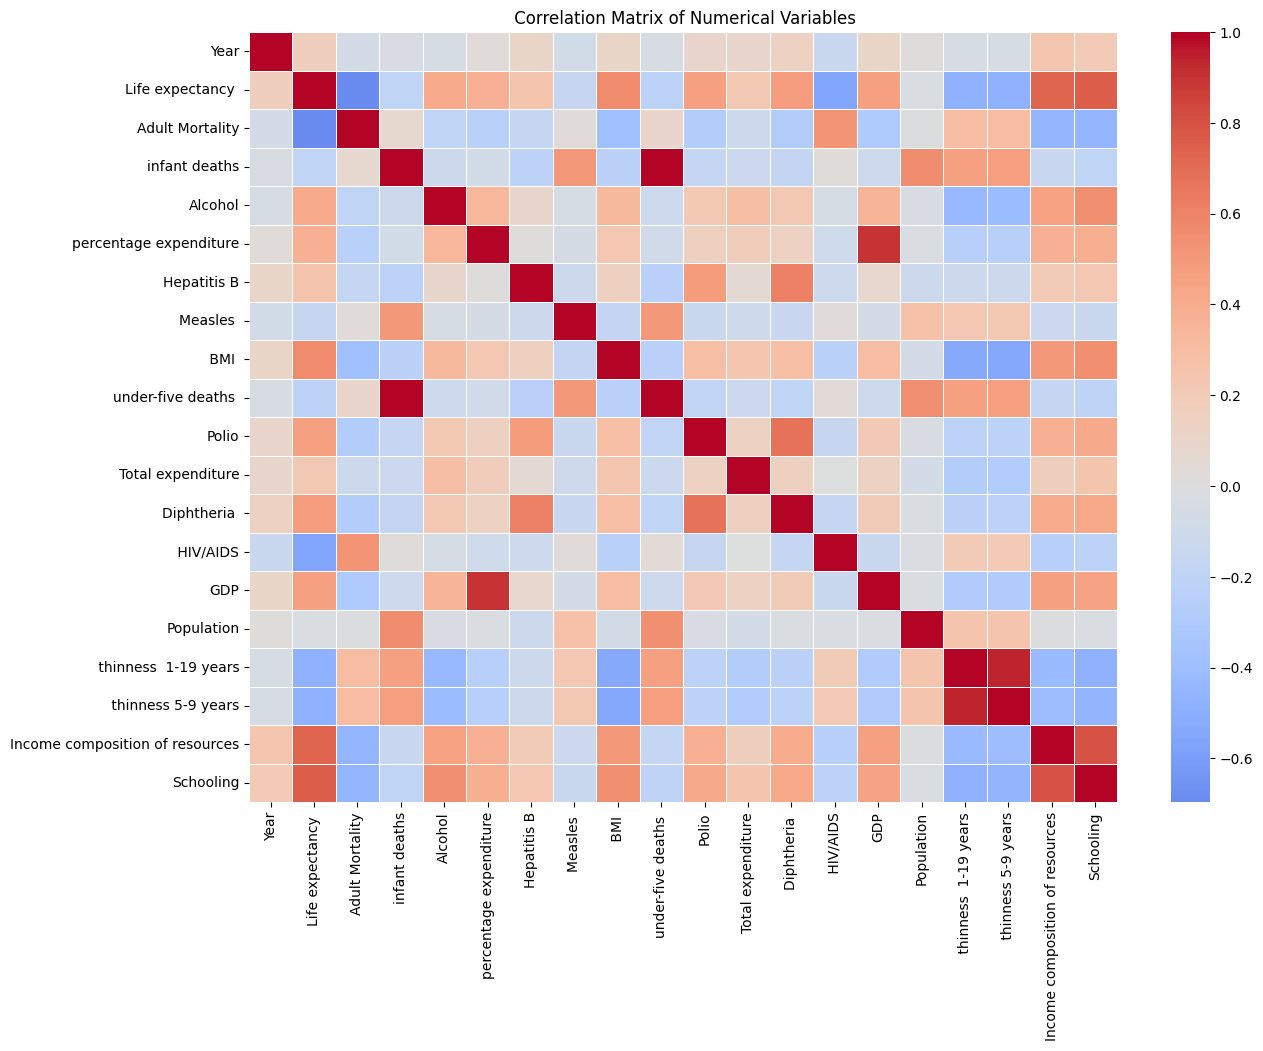

In [16]:
plt.figure(figsize=(14,10))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title(" Correlation Matrix of Numerical Variables")
plt.show()

### Key Correlations with Life Expectancy

Life expectancy shows strong positive correlations with socioeconomic
and healthcare-related variables such as schooling, income composition
of resources, and vaccination coverage. In contrast, strong negative
correlations are observed with adult mortality, infant deaths, and
under-five deaths, indicating that higher mortality rates are associated
with lower life expectancy.


## Temporal Trends in Life Expectancy

This section examines how life expectancy has changed over time
across countries, highlighting overall global trends and variations.


In [18]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [19]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [20]:
le_by_year = (
    df.groupby("year")["life_expectancy"]
    .mean()
    .reset_index()
)

le_by_year

,year,life_expectancy
0,2000,66.750273
1,2001,67.128962
2,2002,67.351366
3,2003,67.433333
4,2004,67.646448
5,2005,68.209290
6,2006,68.667760
7,2007,69.036066
8,2008,69.427869
9,2009,69.938251


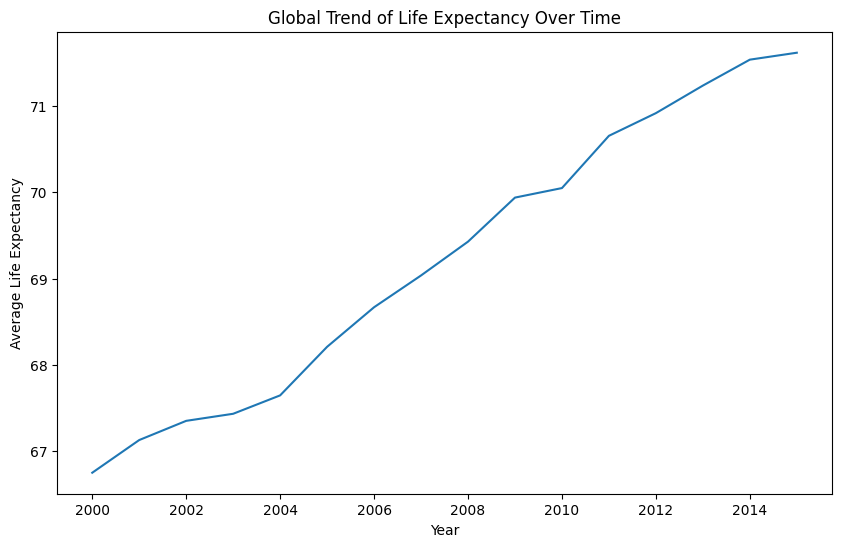

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(le_by_year["year"], le_by_year["life_expectancy"])
plt.xlabel("Year")
plt.ylabel("Average Life Expectancy")
plt.title("Global Trend of Life Expectancy Over Time")
plt.show()

## Country-Level Trends in Life Expectancy

This section compares life expectancy trends over time across selected
countries to highlight differences in development trajectories.


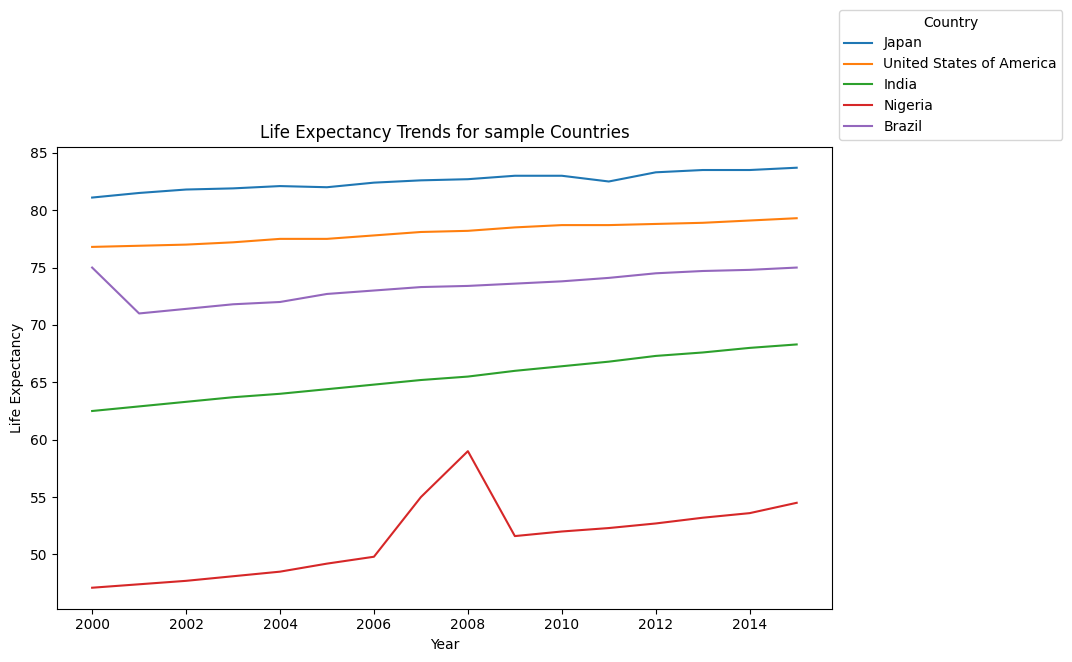

In [40]:
countries = ["Japan", "United States of America", "India", "Nigeria", "Brazil"]

plt.figure(figsize=(10, 6))

for country in countries:
  subset = df[df["country"] == country]
  plt.plot(subset["year"], subset["life_expectancy"], label=country)

plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy Trends for sample Countries")
plt.legend(title = "Country",bbox_to_anchor=(1.00, 1), loc='lower left')
plt.show()

##Key Observation from Life Expectancy by countries

Developed countries such as Japan and US has quite higher life expectancy level compared to develoing countries like India or Nigeria. However, the developping countries show larger increase in life expectancy over time, indication faster improvement despite lower overall levels.

## Life Expectancy Trends by Development Status

This section compares life expectancy trends between developed and
developing countries to highlight structural differences over time.


In [43]:
status_trend = (
    df.groupby(["year", "status"])["life_expectancy"]
    .mean()
    .reset_index()
)

status_trend

,year,status,life_expectancy
0,2000,Developed,76.803125
1,2000,Developing,64.619868
2,2001,Developed,77.128125
3,2001,Developing,65.009934
4,2002,Developed,77.546875
5,2002,Developing,65.190728
6,2003,Developed,77.940625
7,2003,Developing,65.206623
8,2004,Developed,78.384375
9,2004,Developing,65.370861


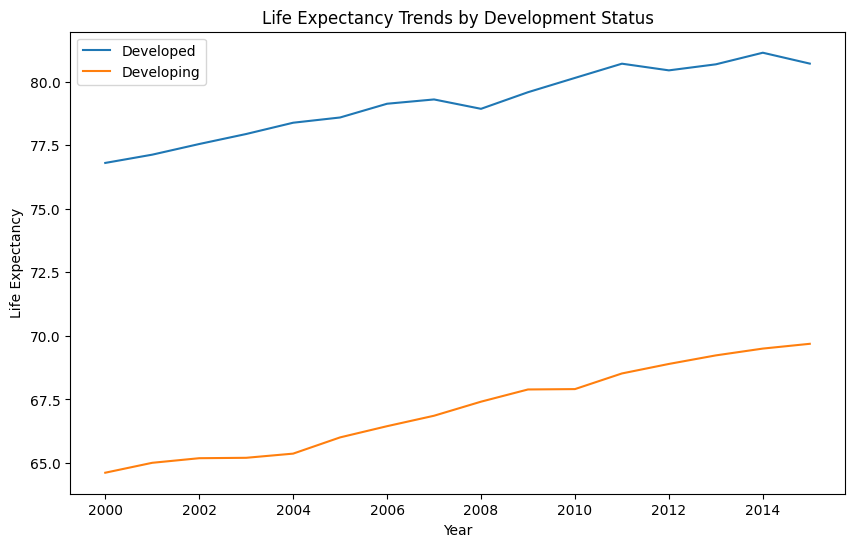

In [45]:
plt.figure(figsize=(10, 6))

for s in status_trend["status"].unique():
  subset = status_trend[status_trend["status"] == s]
  plt.plot(subset["year"], subset["life_expectancy"], label=s)

plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy Trends by Development Status")
plt.legend()
plt.show()

## Summary of Key Findings

### Finding 1: Peristant Life Expectancy Gap by Development Status

Across all observed years, developed countries consistently show higher average life expectancy than developing countries, indicating a persistent gap between the two groups.

### Finding 2: Faster Life Expectancy Growth in Developing Countries

While developing countries start from lower life expectancy levels, they demonstrate larger increases over time compared to developed countries, suggesting faster improvement trajectories.

### Finding 3: Partial Convergence with Remaining Disparities

The gap in life expectancy between developed and developing countries narrows over time; however, a substantial difference remains, indicating only partial convergence.